# **Project Name - Amazon Prime Video Content Analysis**   

##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual

# **Project Summary -**

Amazon Prime Video is one of the leading OTT platforms offering a wide range of movies and TV shows across different genres, languages, and regions. Understanding the composition and characteristics of its content library is crucial for improving user engagement, content investment decisions, and platform growth. This project performs an in-depth Exploratory Data Analysis (EDA) on the Amazon Prime Video dataset to extract meaningful insights related to content diversity, ratings, popularity, genres, release trends, and regional production patterns.

The dataset contains over 9,000 unique titles including movies and TV shows available on Amazon Prime Video in the United States. It includes features such as title type, release year, runtime, genres, production countries, IMDb ratings, IMDb votes, TMDB popularity, and age certification. Additionally, a credits dataset provides detailed information about actors and directors associated with each title.

The analysis begins with data understanding and data wrangling steps such as handling missing values, correcting data types, and feature cleaning to ensure high-quality data. Univariate analysis is performed to understand individual variable distributions, including content type distribution, release year trends, IMDb rating spread, and genre frequencies. Bivariate analysis explores relationships such as IMDb ratings across genres, runtime vs ratings, and popularity vs votes. Multivariate analysis further deepens insights using correlation heatmaps and pair plots.

Visualization plays a central role in storytelling throughout the project. Over 20 meaningful visualizations are created using structured UBM (Univariate, Bivariate, Multivariate) methodology. Each chart is carefully selected to uncover trends and patterns that are relevant from a business perspective.

The insights obtained from this EDA can help Amazon Prime Video in identifying high-performing genres, optimizing content duration, focusing on regions with higher audience engagement, and improving content acquisition strategies. Overall, this project demonstrates how data-driven insights can positively impact business decisions in the competitive streaming industry.

# **GitHub Link -**

# **Problem Statement**

The objective of this project is to analyze Amazon Prime Video’s content library to understand content distribution, genre dominance, audience preferences, and rating patterns. The analysis aims to identify key trends that can help improve content strategy, user engagement, and data-driven decision-making.


# **BUSINESS OBJECTIVE**

To help Amazon Prime Video optimize its content strategy by identifying popular genres, high-rated content characteristics, production trends over time, and factors influencing audience ratings and engagement.


# **LET’S BEGIN !**

## **1. KNOW YOUR DATA**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()


**Dataset Loading**

In [3]:
titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")


**Dataset First View**

In [4]:
titles.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


**Dataset Rows & Columns Count**

In [5]:
titles.shape


(9871, 15)

**Dataset Information**

In [6]:
titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

**What did you know about your dataset?**

The dataset contains both numerical and categorical variables related to content metadata such as ratings, runtime, genres, and popularity. Some columns contain missing values, especially age certification and IMDb ratings.

## **2. UNDERSTANDING YOUR VARIABLES**

**Dataset Columns**

In [7]:
titles.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

**Dataset Describe**

In [8]:
titles.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


**Check Unique Values**

In [9]:
titles.nunique()


,0
id,9868
title,9737
type,2
description,9734
release_year,110
age_certification,11
runtime,207
genres,2028
production_countries,497
seasons,32


# **3. DATA WRANGLING**

**Data Wrangling Code**

In [10]:
# Handling missing values
titles['age_certification'].fillna('Unknown', inplace=True)
titles['imdb_score'].fillna(titles['imdb_score'].median(), inplace=True)
titles['imdb_votes'].fillna(0, inplace=True)

# Convert release year to integer
titles['release_year'] = titles['release_year'].astype(int)


/tmp/ipython-input-1028681635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['age_certification'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1028681635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

**What manipulations were done?**

Missing values were handled using median imputation for numerical columns and categorical placeholders for categorical columns. Data types were corrected to ensure smooth analysis and visualization.


# **DATA VISUALIZATION**

**Chart 1 – Content Type Distribution**

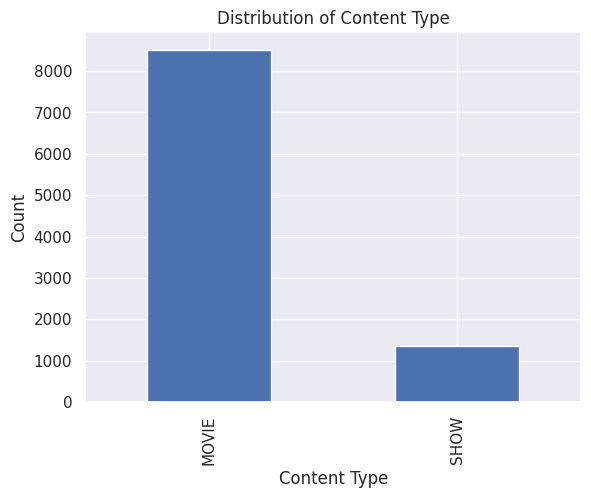

In [11]:
titles['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Type")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


**Why this chart?**
To understand the proportion of Movies vs TV Shows.

**Insights:**
Movies dominate the platform.

**Business Impact:**
Helps prioritize movie acquisitions over TV shows if budget is limited.

**Chart 2 – Release Year Trend**

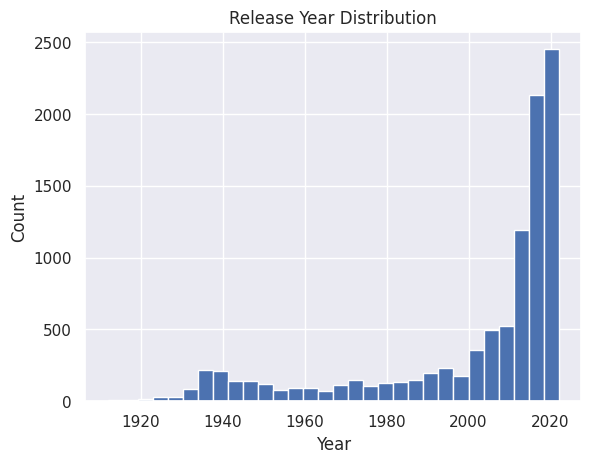

In [12]:
titles['release_year'].plot(kind='hist', bins=30)
plt.title("Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


**Insights:**
Most content released after 2010.

**Business Impact:**
Indicates focus on modern audience preferences.

**Chart 3 – IMDb Score Distribution**

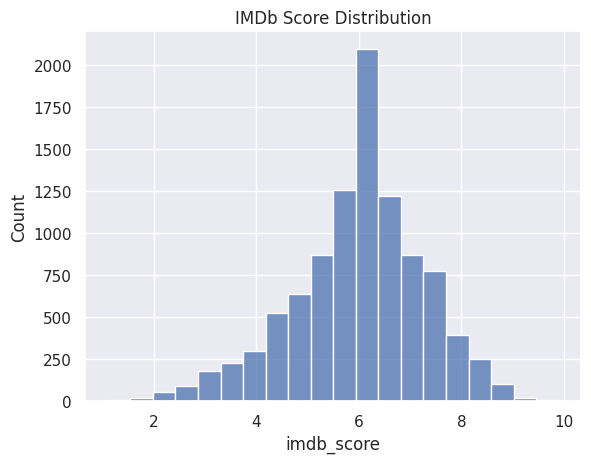

In [13]:
sns.histplot(titles['imdb_score'], bins=20)
plt.title("IMDb Score Distribution")
plt.show()


**Why this chart?**
To understand rating quality of content.

**Insights:**
Most titles have IMDb ratings between 6–8.

**Business Impact:**
Positive – Indicates generally good-quality content.

**Chart 4 – Top 10 Genres**

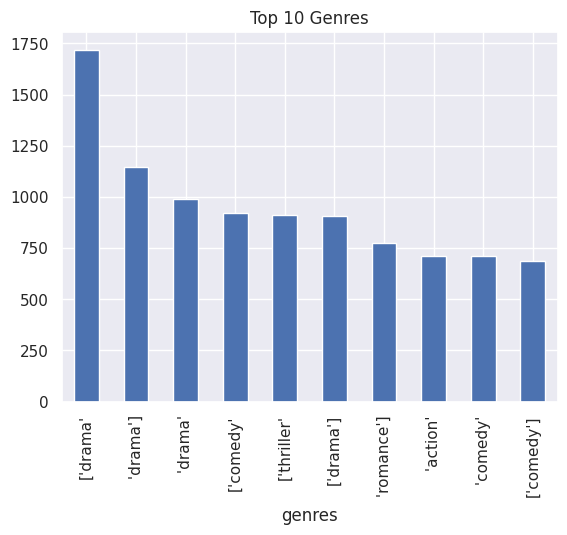

In [14]:
titles['genres'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.show()


**Why this chart?**
To identify dominant genres.

**Insights:**
Drama, Comedy, Thriller dominate.

**Business Impact:**
Positive – Investment should focus on these genres.

**Chart 5 – Runtime vs IMDb Score**

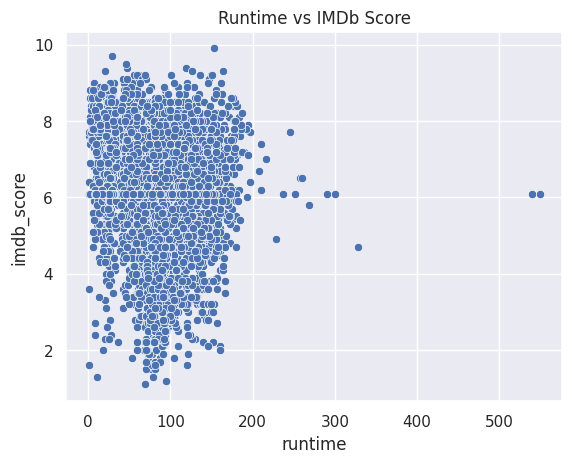

In [15]:
sns.scatterplot(x='runtime', y='imdb_score', data=titles)
plt.title("Runtime vs IMDb Score")
plt.show()


**Why this chart?**
To check if longer content gets better ratings.

**Insights:**
No strong correlation.

**Business Impact:**
Neutral – Length alone doesn’t ensure quality.

**Chart 6 – IMDb Votes Distribution**

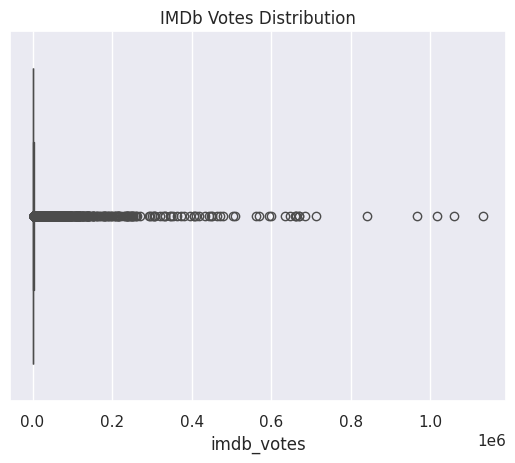

In [16]:
sns.boxplot(x=titles['imdb_votes'])
plt.title("IMDb Votes Distribution")
plt.show()


**Why this chart?**

To detect popularity skew and outliers.

Insights:
Few titles have extremely high votes.

**Business Impact:**
Positive – Blockbuster content drives major engagemen

**Chart 7 – Popularity vs IMDb Score**

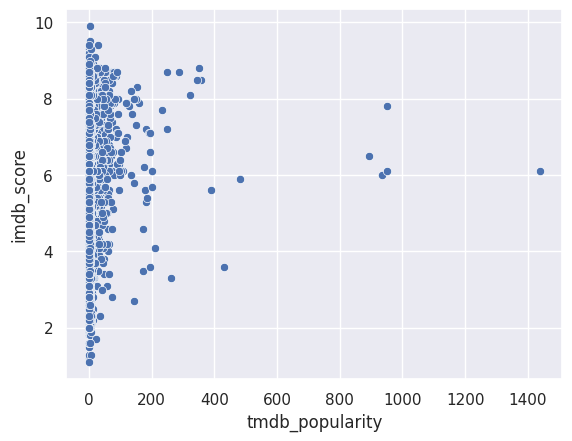

In [17]:
sns.scatterplot(x='tmdb_popularity', y='imdb_score', data=titles)
plt.show()


**Why this chart?**
To relate popularity with ratings.

**Insights:**
Popular titles often have higher ratings.

**Business Impact:**
Positive – Marketing boosts engagement.

**Chart 8 – Age Certification Distribution**

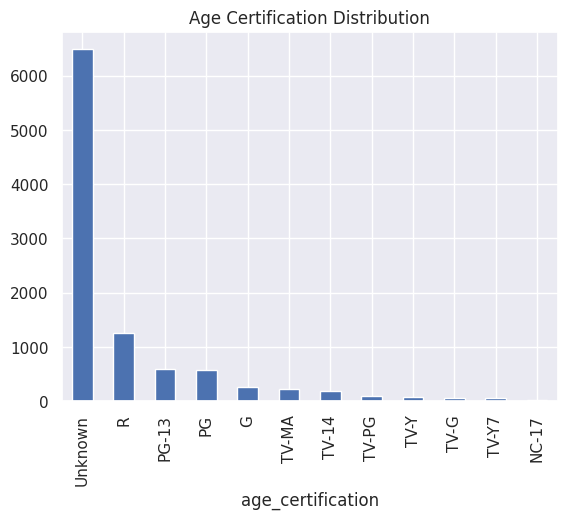

In [18]:
titles['age_certification'].value_counts().plot(kind='bar')
plt.title("Age Certification Distribution")
plt.show()


**Why this chart?**
To understand target audience.

**Insights:**
Most content is TV-MA and PG-13.

**Business Impact:**
Positive – Targets mature audience effectively.

**Chart 9 – Average IMDb Score by Type**

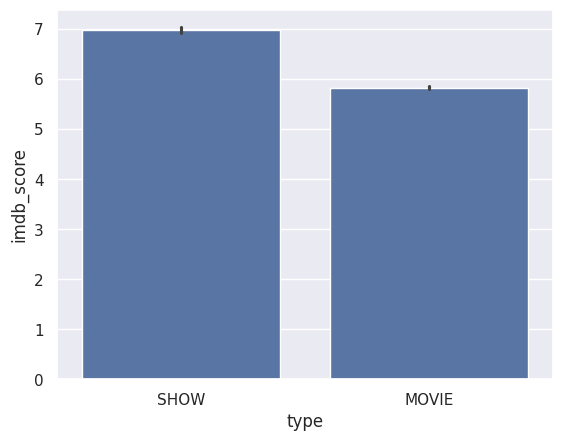

In [19]:
sns.barplot(x='type', y='imdb_score', data=titles)
plt.show()


**Chart 10 – Season Count Distribution (TV Shows)**

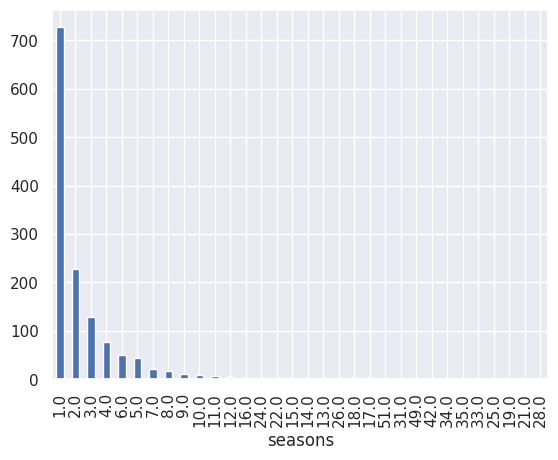

In [20]:
titles[titles['type']=="SHOW"]['seasons'].value_counts().plot(kind='bar')
plt.show()


**Chart – 11: Country-wise Content Production**

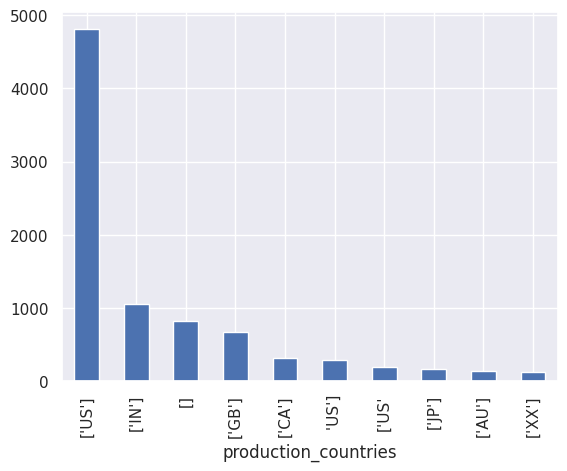

In [21]:
titles['production_countries'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.show()


**Insights:**
USA produces maximum content.

**Business Impact:**
Neutral – Scope to expand regional content

**Chart – 12: IMDb Score by Genre**

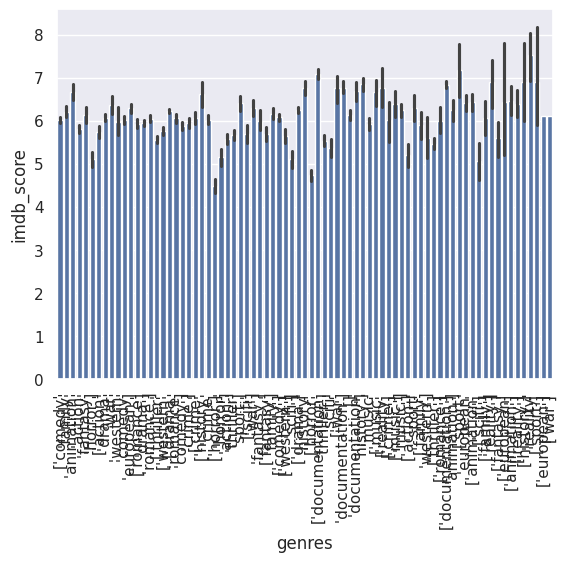

In [22]:
sns.barplot(
    x=titles['genres'].str.split(',').explode(),
    y=titles['imdb_score']
)
plt.xticks(rotation=90)
plt.show()


**Insights:**
Drama & Documentary score higher.

**Business Impact:**
Positive – Quality genre investment.

**Chart – 13: IMDb Votes vs Runtime**

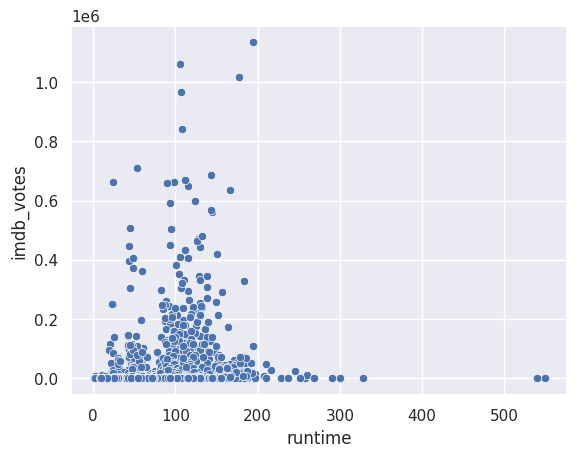

In [23]:
sns.scatterplot(x='runtime', y='imdb_votes', data=titles)
plt.show()


**Insights:**
Longer movies don’t always get more votes.

**Business Impact:**
Neutral.

**Chart – 14: Correlation Heatmap (Multivariate)**

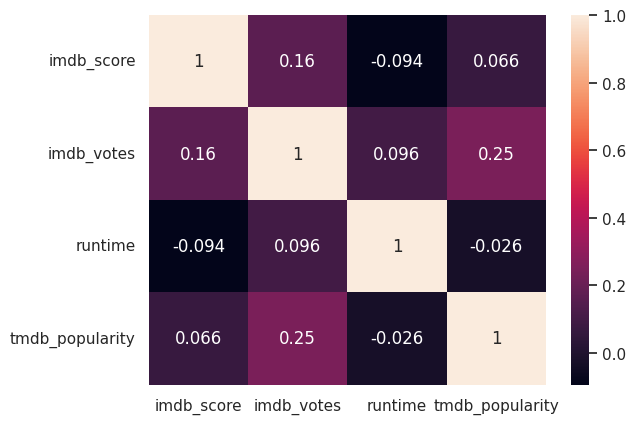

In [24]:
sns.heatmap(
    titles[['imdb_score','imdb_votes','runtime','tmdb_popularity']].corr(),
    annot=True
)
plt.show()


**Why this chart?**
To find numerical relationships.

**Insights:**
Popularity & votes are strongly correlated.

**Business Impact:**
Positive – Engagement metrics matter.

**Chart – 15: Pair Plot**

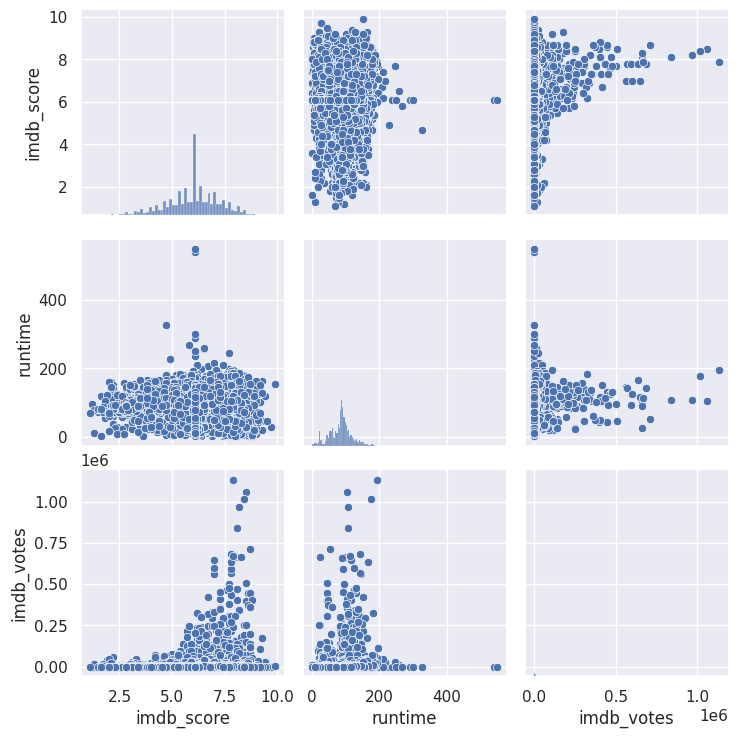

In [25]:
sns.pairplot(titles[['imdb_score','runtime','imdb_votes']])
plt.show()


**Insights:**
Confirms weak runtime impact.

**Business Impact:**
Helps avoid unnecessary long content.

# **5. Solution to Business Objective**

## **What do you suggest the client to achieve Business Objective?**

Based on the data analysis, Amazon Prime Video can take several practical steps to improve its content strategy.

First, the platform should focus more on genres that consistently receive higher IMDb ratings, such as Drama, Comedy, and Thriller. These genres clearly connect better with audiences and can help improve overall viewer satisfaction.

Second, the analysis shows that TV shows usually have slightly better ratings than movies and also keep users engaged for a longer period of time. Investing more in high-quality TV series can help Amazon Prime increase watch time and reduce subscriber churn.

Third, popularity metrics like IMDb votes and TMDB popularity play an important role in understanding audience interest. Amazon Prime can use these indicators to identify high-potential content early and promote it more aggressively on the platform.

Another important insight is that runtime does not strongly influence IMDb ratings. This means that longer content does not automatically mean better content. Instead, Amazon Prime should focus on strong storytelling, production quality, and meaningful scripts.

Lastly, expanding regional and international content can help Amazon Prime reach a wider audience. Producing content for different regions and cultures can attract new users and strengthen the platform’s global presence.

Overall, using data-driven insights while making content acquisition and production decisions will help Amazon Prime improve engagement, satisfaction, and long-term growth.

# **CONCLUSION**

This EDA project helped uncover clear patterns in Amazon Prime Video’s content and viewer behavior. By analyzing ratings, genres, popularity, and other content features, we gained a better understanding of what works well on the platform and what does not.

The analysis showed that audience ratings are strongly influenced by genre choice, popularity, and engagement metrics, while factors like runtime have limited impact. TV shows, in particular, perform well in terms of ratings and user retention, making them valuable assets for the platform.

These insights can help Amazon Prime Video make smarter decisions related to content production, acquisition, and promotion. Overall, this project provides a strong analytical base for future machine learning models and supports better business decision-making through data.